**DIDIT JOHAR MAULANA** - 
**DAI-005** - 
**TELKOM UNIVERSITY**



IMPORT LIBRARY

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

READ DATASET FROM GDRIVE

In [ ]:
url = 'https://drive.google.com/file/d/1RLRUvxvE2fahHs16cCYbHN_svOE9QKfm/view?usp=sharing' 
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + '1RLRUvxvE2fahHs16cCYbHN_svOE9QKfm'
df = pd.read_csv(dwn_url)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


DATA EXPLORATIONS

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df.shape

(21613, 21)

In [ ]:
dup_rows = df[df.duplicated()]
print('Number of duplicate', dup_rows.shape)

Number of duplicate (0, 21)


In [ ]:
df.isnull().sum()/len(df)*100

id               0.0
date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64

DATA PREPARATIONS

In [ ]:
df = df.drop(['id', 'date', 'zipcode', 'waterfront', 'view', 'yr_renovated', 'lat', 'long', 'sqft_lot', 'floors', 'sqft_living15', 'sqft_lot15', 'yr_renovated', 'sqft_basement', 'sqft_above'], axis=1)
df

,price,bedrooms,bathrooms,sqft_living,condition,grade,yr_built
0,221900.0,3,1.00,1180,3,7,1955
1,538000.0,3,2.25,2570,3,7,1951
2,180000.0,2,1.00,770,3,6,1933
3,604000.0,4,3.00,1960,5,7,1965
4,510000.0,3,2.00,1680,3,8,1987
...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3,8,2009
21609,400000.0,4,2.50,2310,3,8,2014
21610,402101.0,2,0.75,1020,3,7,2009
21611,400000.0,3,2.50,1600,3,8,2004


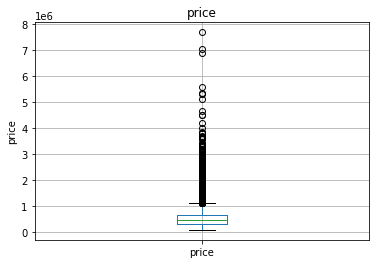

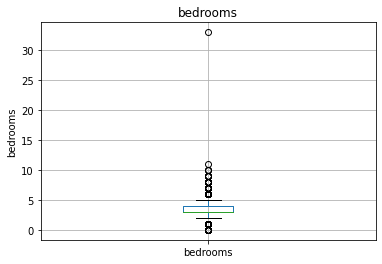

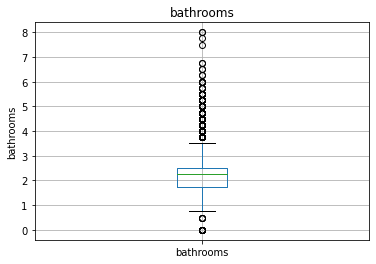

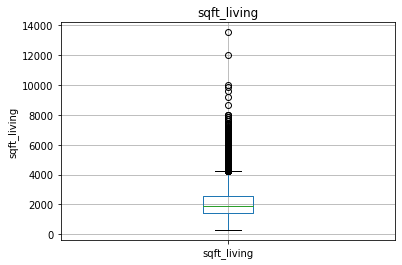

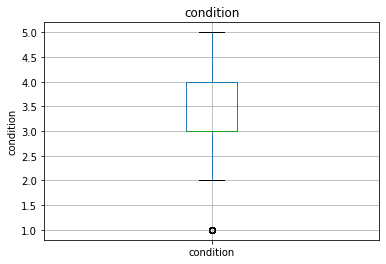

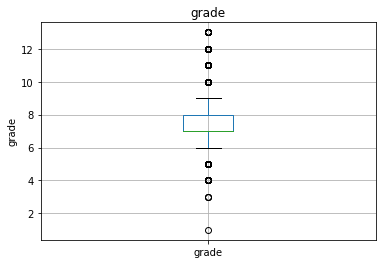

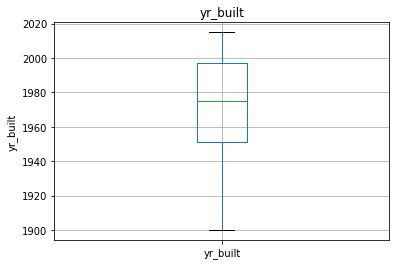

In [ ]:
#cek outlayer
for feature in df.columns:
  if df[feature].dtypes == 'object' or feature == 'id':
    pass
  else:
    df.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

HANDLING OUTLIER

In [ ]:
# calculate interquartile range
def interquartile(df,x):
  q1 = (df[x]).quantile(0.25)
  q3 = (df[x]).quantile(0.75) 
  iqr = q3 - q1 
  max = q3 + (1.5 *iqr)
  min = q1 - (1.5 *iqr)
  return max,min

#Replacing outliers
def replace_outliers(df,x,maximum,minimum):
  more_than = (df[x] > maximum)
  less_than = (df[x] < minimum)
  df[x] = df[x].mask(more_than, maximum,axis=0)
  df[x] = df[x].mask(less_than, minimum,axis=0)
  return df

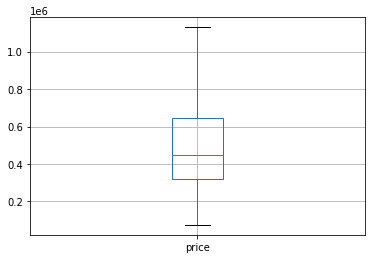

In [ ]:
maximum,minimum = interquartile(df,'price')
df = replace_outliers(df,'price',maximum,minimum)
boxplot = df.boxplot(column=['price'])

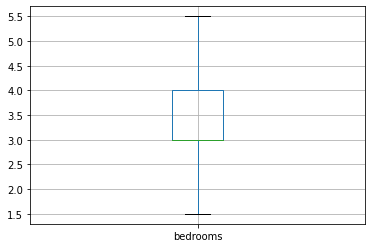

In [ ]:
maximum,minimum = interquartile(df,'bedrooms')
df = replace_outliers(df,'bedrooms',maximum,minimum)
boxplot = df.boxplot(column=['bedrooms'])

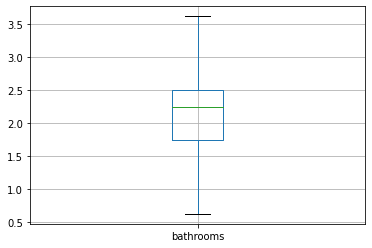

In [ ]:
maximum,minimum = interquartile(df,'bathrooms')
df = replace_outliers(df,'bathrooms',maximum,minimum)
boxplot = df.boxplot(column=['bathrooms'])

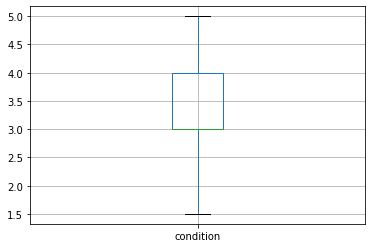

In [ ]:
maximum,minimum = interquartile(df,'condition')
df = replace_outliers(df,'condition',maximum,minimum)
boxplot = df.boxplot(column=['condition'])

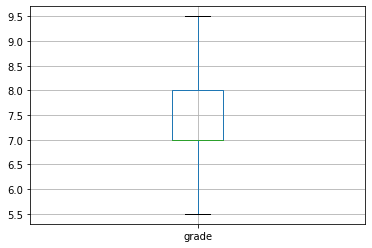

In [ ]:
maximum,minimum = interquartile(df,'grade')
df = replace_outliers(df,'grade',maximum,minimum)
boxplot = df.boxplot(column=['grade'])

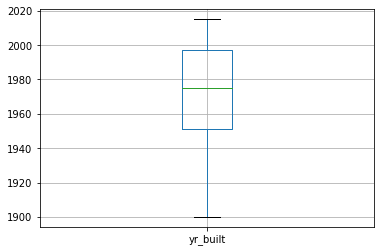

In [ ]:
maximum,minimum = interquartile(df,'yr_built')
df = replace_outliers(df,'yr_built',maximum,minimum)
boxplot = df.boxplot(column=['yr_built'])

CORRELATIONS CHECK

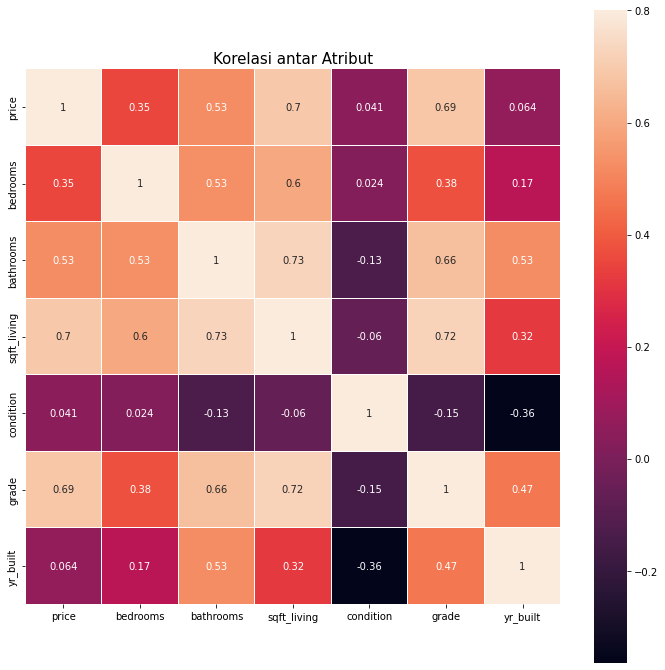

In [ ]:
corr = df.corr()
plt.figure(figsize=(12, 12))
sns.color_palette(as_cmap=True)
sns.heatmap(df.corr(), vmax=0.8, linewidths=0.01, square=True, annot=True)
plt.title('Korelasi antar Atribut', y=1, size=15)
plt.show()

LINEAR REGRESSION

In [ ]:
x = df.drop(columns='price')
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)

lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train)

print(lin_reg.coef_)
print(lin_reg.intercept_)

[-2.52340356e+04  4.56543340e+04  1.04867691e+02  1.42075275e+04
  1.29976059e+05 -2.91031026e+03]
4981796.86096661


In [ ]:
lin_reg.score(x_test, y_test)

0.6455288789147409

In [ ]:
print(lin_reg.predict([[3, 2, 1680, 3, 8, 2001]]))

[432481.35797172]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
df.to_csv('FinalCapstone.csv', index = True)